In [1]:
import pandas as pd
import seaborn as sns

In [2]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
from sklearn.tree import DecisionTreeRegressor
penguins = penguins.dropna()

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
penguins_train, penguins_test = train_test_split(penguins, test_size=0.3, random_state=42)
print(penguins_train.shape, penguins_test.shape)

(233, 7) (100, 7)


In [6]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [7]:
features= ['body_mass_g']
dt_regression = DecisionTreeRegressor(max_depth = 2) # Increase max_depth to see effect in the plot
dt_regression.fit(penguins_train[features], penguins_train['bill_depth_mm'])

DecisionTreeRegressor(max_depth=2)

In [8]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

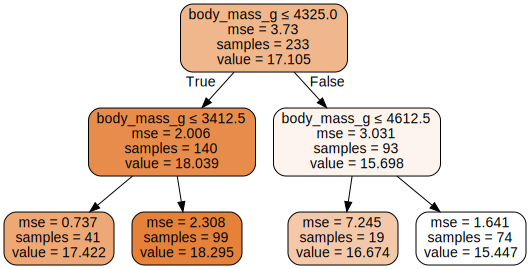

In [9]:
plot_tree_regression(dt_regression, features)

In [10]:
predictionsOnTrainset = dt_regression.predict(penguins_train[features])
predictionsOnTestset = dt_regression.predict(penguins_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, penguins_train.body_mass_g)
rmseTest = calculate_rmse(predictionsOnTestset, penguins_test.body_mass_g)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 4261.12377212783
RMSE on test set 4279.204301706619


Ik had verwacht dat de RMSE kleiner zou zijn bij de training set als bij de test set met een diepte van 2 (RMSE on training set 4261.12377212783 RMSE on test set 4279.204301706619). Ik had alleen een groter verschil verwacht tussen de training set en de test set op het moment dat ik de diepte veranderde naar 100 dit leverde alleen een minimaal verschil op(RMSE on training set 4261.119303256543 RMSE on test set 4279.14827263343).

De tree werkt als volgt in de eerste stap kijkt hij of het gewicht groter of gelijk is aan 4325 als dit waar is zet hij hem naar links als dit niet zo is zet hij hem naar rechts. Dit blijft hij eigenlijk netzo lang doen tot hij niet meer verder kan of de gezette diepte heeft bereikt. De mse die je ziet staan is het gemiddelde gekwadrateerde verschil tussen de geschatte waarden en de werkelijke waarde en je ziet dat deze verder afneemt naar mate je dieper de boom in gaat.